Neonicotinoid pesticides, also called Neonic pesticides, include acetamiprid, clothianidin, imidacloprid, nitenpyram, nithiazine, thiacloprid and thiamethoxam. Neonicotinoids are nuero-active and used by coating seeds or through treated water in irrigation.

The use of Neoniniconoid pesticides have been linked to several ecological issues. The most notable of these is Colony Collapse Disorder (CCD).
Because of this, the use of Neonicotinoids has been restricted or banned in parts of Canada and the European Union. Within the US, there have been petitions to the EPA, lawsuits and attempts in legislation to ban certain Neonicotinoids. However, they are still in use.

In this Exploratory Data Analysis (EDA), I will look for correlations in the use of Neonicotinoid Pesticides and 
Honey Bee populations and productivity throughout the US. 
I will be conducting my data analysis using the kaggle dataset "Honeybees and Neonic Pesticides" by Kevin Smith.
Data was acquired through the USGS and USDA.


MY QUESTIONS:
1. How has Honey Bee productivity changed between 1991 and 2017?

2. How prevalent are Neonicotinoid pesticides in the history and current state of Honey production?

3. Is there a relationship between the decline of Honey Bees and the use of Neonicotinoids?




In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline


bee_data = pd.read_csv("/Users/joshhawkins/Desktop/Code Post-China/Honey Bees and Neonic Pesticide Data/vHoneyNeonic_v03.csv")
bee_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# First, I will rename the neonicotinoid columns for easier reading once it becomes time to visualize

bee_data = bee_data.rename(columns={'nCLOTHIANIDIN':"Clothianidin",'nIMIDACLOPRID': "Imidacloprid", 'nTHIAMETHOXAM': "Thiamethoxam", 'nACETAMIPRID': "Acetamiprid", 'nTHIACLOPRID': "Thiacloprid", 'nAllNeonic': "Total Neonic"})
bee_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,Clothianidin,Imidacloprid,Thiamethoxam,Acetamiprid,Thiacloprid,Total Neonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


The data includes many useful quantitative values that deal with the production value of honey, yield for honey
number of bee colonies, neonic fertilizers used, and the amount.

The year, region, and state columns allow me to examine the fluctuation of and correlation between 
the above values over time and relative to location

In [33]:
# Next, I'll search for null values to get a feel for holes in the data set.

bee_data.isnull().sum()

state             0
numcol            0
yieldpercol       0
totalprod         0
stocks            0
priceperlb        0
prodvalue         0
year              0
StateName         0
Region            0
FIPS              0
Clothianidin    237
Imidacloprid    237
Thiamethoxam    237
Acetamiprid     237
Thiacloprid     237
Total Neonic    237
dtype: int64

The null values in the Neonic fertilizer columns likely indicate the time before their use and 
a possible discontinuation in recent use. 
This is good for my analysis as it provides a natural with/without comparison


In [34]:
bee_data = bee_data.fillna(0)
bee_data.isnull().sum()

state           0
numcol          0
yieldpercol     0
totalprod       0
stocks          0
priceperlb      0
prodvalue       0
year            0
StateName       0
Region          0
FIPS            0
Clothianidin    0
Imidacloprid    0
Thiamethoxam    0
Acetamiprid     0
Thiacloprid     0
Total Neonic    0
dtype: int64

In [35]:
# all NaN values are now zeros
# Next, I will check if all states are included using the state column

bee_data.state.unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

There are only 44 states listed. 
Missing: Alaska, Connecticut, Massachussetts, Delaware, Rhode Island, New Hampshire, 

I imagine Alaska is not a big honey producer due to harsher winters.
The gap in information for most of the New England states is concerning, but 88% of the US 
is still a reasonably whole analysis

In [36]:
# Now I'll examine the year values.

bee_data.year.value_counts()

1991    44
2003    44
1992    44
1993    44
1994    44
1995    44
1996    44
2001    44
2002    44
1997    43
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2016    40
2009    40
2010    40
2011    40
2012    40
2014    40
2015    40
2017    40
2013    39
Name: year, dtype: int64

In [37]:
# There are some missing years in the data, none seem drastic

# I will see how the year gaps express themselves between states.

bee_data.state.value_counts()

IA    27
WI    27
TX    27
FL    27
CO    27
KY    27
ND    27
PA    27
LA    27
WV    27
OR    27
ME    27
CA    27
MT    27
WA    27
GA    27
MS    27
WY    27
IN    27
NY    27
AL    27
MI    27
ID    27
NC    27
MN    27
VT    27
TN    27
UT    27
IL    27
AZ    27
AR    27
SD    27
MO    27
NE    27
OH    27
KS    27
NJ    27
VA    27
HI    27
NM    22
NV    18
SC    13
OK    13
MD    13
Name: state, dtype: int64

39 States haves information for all 27 years
Oklahoma, South Carolina, Maryland, Nevada, and New Mexico are luckily at least somewhat spread out across the US.
While inserting means for missing values is an option depending on the dataset and frame for analysis,
in this case I have chosen to remove the five states with missing years.
The gaps are too great and will skew the analysis

In [38]:
# For my analysis, states with missing years will be removed.
# Even New Mexico, the state with the least amount of missing years, is still missing 5.
# That is still almost 20% of the data missing. It will undoubtably affect the analysis and must be removed.

incomplete_states = ['NM', 'NV', 'SC', 'OK', 'MD']

for i in incomplete_states:
    bee_data = bee_data[bee_data.state != i]

bee_data.state.value_counts()


IA    27
OR    27
FL    27
CO    27
KY    27
ND    27
PA    27
LA    27
WV    27
ME    27
WI    27
CA    27
MT    27
WA    27
GA    27
MS    27
WY    27
IN    27
TX    27
MI    27
NY    27
AR    27
NC    27
MN    27
VT    27
TN    27
UT    27
IL    27
AZ    27
SD    27
ID    27
MO    27
NE    27
OH    27
KS    27
NJ    27
VA    27
HI    27
AL    27
Name: state, dtype: int64

In [39]:
# Now I will examine the data types to ensure that the values I want to measure for fluctuation and 
# correlation match

bee_data.dtypes

state            object
numcol          float64
yieldpercol       int64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year              int64
StateName        object
Region           object
FIPS              int64
Clothianidin    float64
Imidacloprid    float64
Thiamethoxam    float64
Acetamiprid     float64
Thiacloprid     float64
Total Neonic    float64
dtype: object

In [40]:
# In looking at the data types, I see that 'yieldpercol' will need to be converted for future 
# analysis of value data to map correlations

bee_data.loc[:,'yieldpercol'] = bee_data.loc[:,'yieldpercol'].astype('float')
bee_data.dtypes

state            object
numcol          float64
yieldpercol     float64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year              int64
StateName        object
Region           object
FIPS              int64
Clothianidin    float64
Imidacloprid    float64
Thiamethoxam    float64
Acetamiprid     float64
Thiacloprid     float64
Total Neonic    float64
dtype: object

BOX PLOTS
I chose to use box plots first in order to get a more accurate depiction of the data.
Box plots do a great job of showing where the majority of the data is and expresses outliers well
I will plot timelapses of Neonic pesticide use, colony numbers, and yield per colony


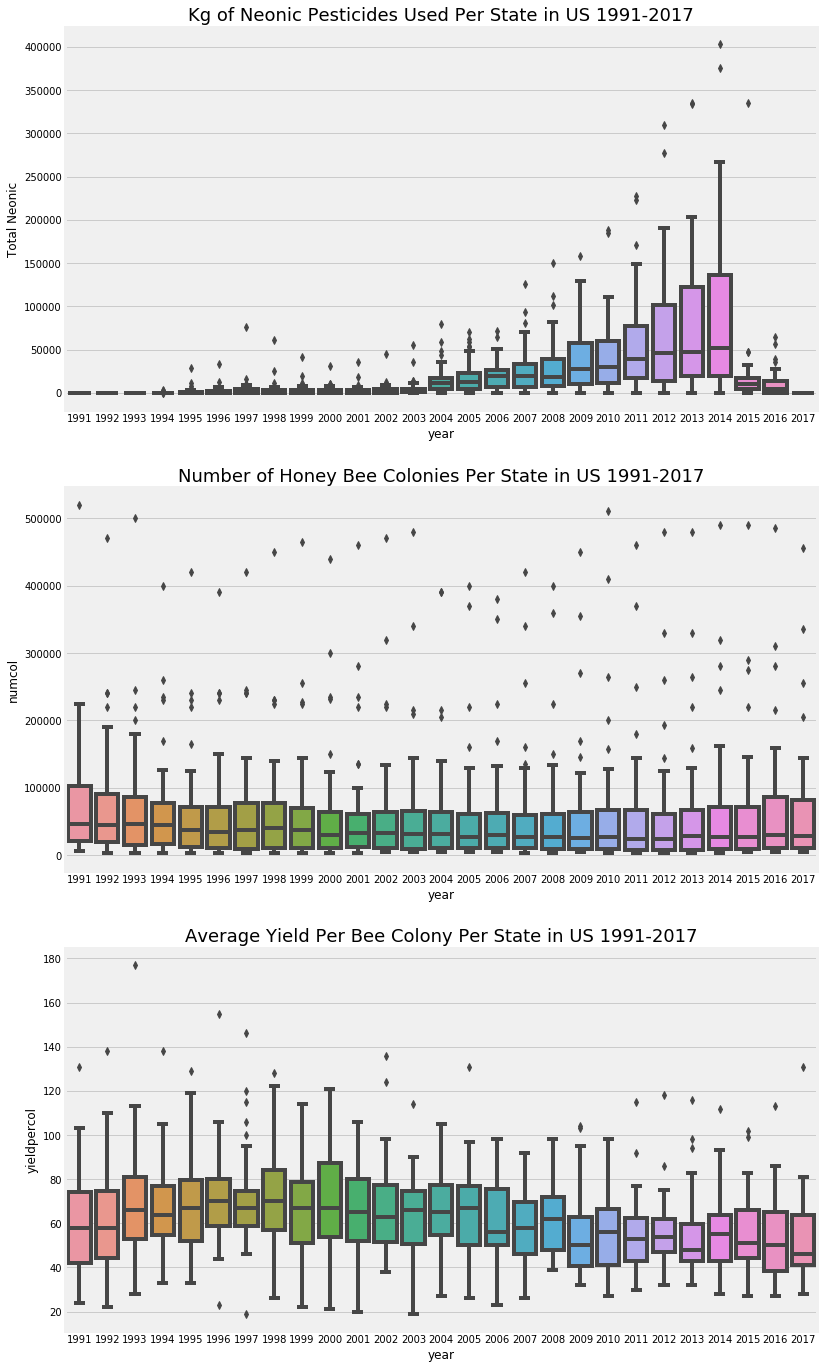

In [41]:
fig, plot = plt.subplots(3, 1, figsize=(12, 24))

sns.boxplot(x='year', y='Total Neonic',  data=bee_data, ax=plot[0])
plot[0].set_title("Kg of Neonic Pesticides Used Per State in US 1991-2017", fontsize=18)

sns.boxplot(x='year', y='numcol',  data=bee_data, ax=plot[1])
plot[1].set_title("Number of Honey Bee Colonies Per State in US 1991-2017", fontsize=18)

sns.boxplot(x='year', y='yieldpercol',  data=bee_data, ax=plot[2])
plot[2].set_title("Average Yield Per Bee Colony Per State in US 1991-2017", fontsize=18)

plt.show()

OBSERVATIONS:

1. Neonic pesticide use shows an uptick between 2003-2004 with a strong upward trend met with drastic drop off beginning in the year 2015.

2. The number of colonies show a faint depression in the years that Neonic pesticides were most widely used

3. The yield per colony appears to show a subtle downward trend as Neonic pesticide use began to pick up in 2003 

4. Outliers are quite rampant in the yield and colony data. This makes a the absence or the presence of a causal
   relationship difficult to prove.


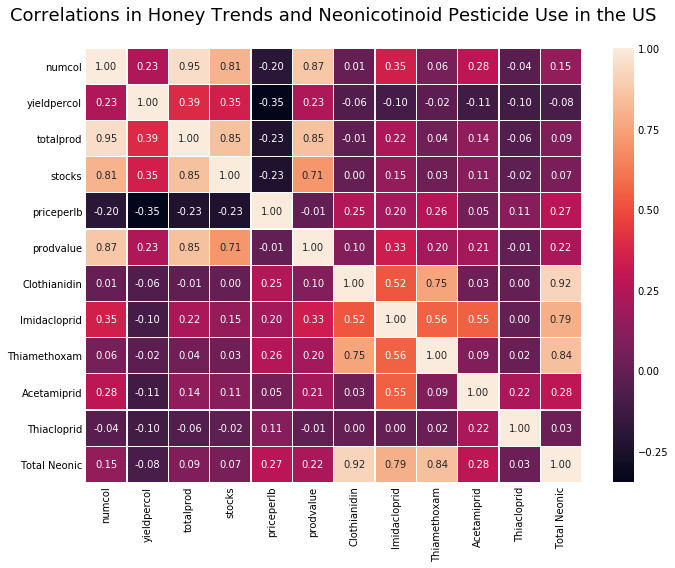

In [42]:
# Now, we'll look for correlations using a heatmap.

continuous_cols = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue', 'Clothianidin', 'Imidacloprid',
                  'Thiamethoxam', 'Acetamiprid', 'Thiacloprid', 'Total Neonic']
numeric_data = bee_data[continuous_cols]


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=.2, fmt= '.2f')
tt1 = plt.title("Correlations in Honey Trends and Neonicotinoid Pesticide Use in the US", fontsize=18) 
tt1.set_position([.5, 1.05])
plt.tight_layout(h_pad=3.0)
plt.show()



OBSERVATIONS

1. It appears the strongest correlation is that the use of Neonicotinoid pesticides drives the cost per pound of honey    up. 

2. The use of Neonicotinoid pesticides also shows a weak correlation of an increase in the number of colonies 
   accompanied by a decrease in yield per colony.



In [43]:
# Let's look at the data regionally to see if any hidden patterns exist

bee_data.Region.value_counts()

Midwest      324
South        324
West         270
Northeast    135
Name: Region, dtype: int64

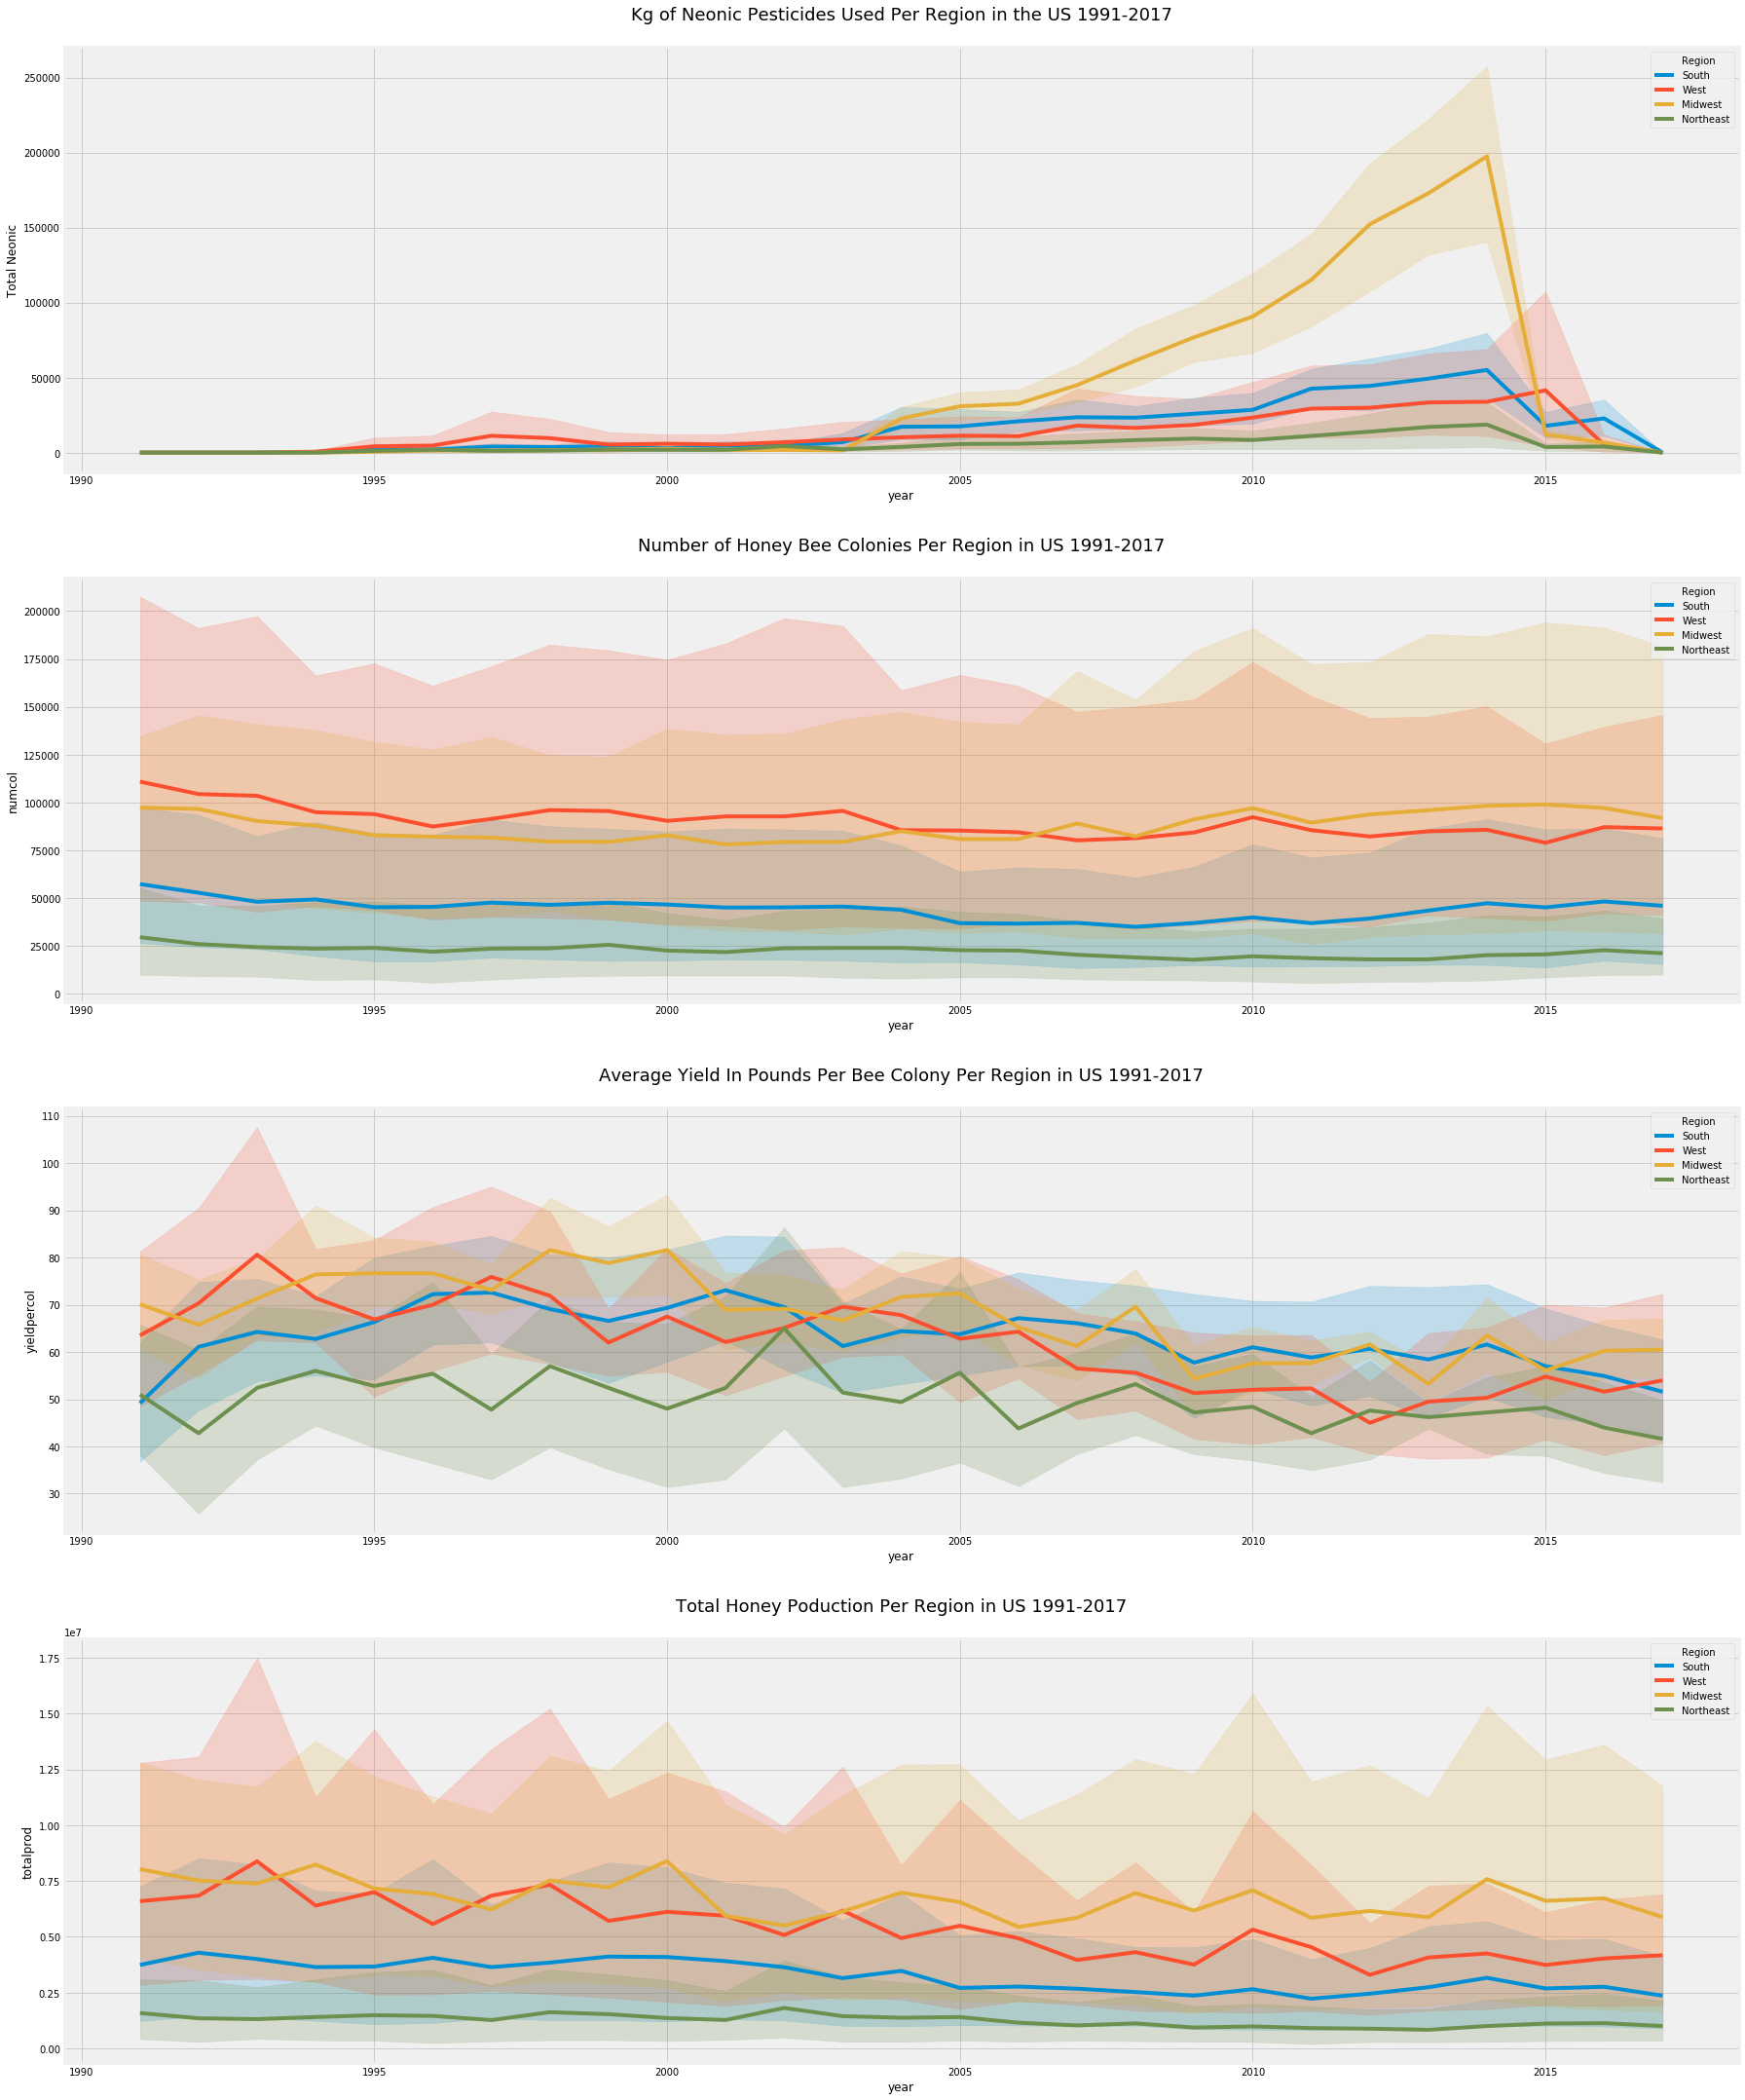

In [45]:
fig, plot = plt.subplots(4, 1, figsize=(25, 30))


sns.lineplot(x='year', y='Total Neonic', hue='Region', data=bee_data, ax=plot[0])
plot[0].set_title("Kg of Neonic Pesticides Used Per Region in the US 1991-2017", fontsize=18)
tt1 = plot[0].title
tt1.set_position([.5, 1.05])

sns.lineplot(x='year', y='numcol', hue='Region',  data=bee_data, ax=plot[1])
plot[1].set_title("Number of Honey Bee Colonies Per Region in US 1991-2017", fontsize=18)
tt2 = plot[1].title
tt2.set_position([.5, 1.05])


sns.lineplot(x='year', y='yieldpercol', hue='Region',  data=bee_data, ax=plot[2])
plot[2].set_title("Average Yield In Pounds Per Bee Colony Per Region in US 1991-2017", fontsize=18)
tt3 = plot[2].title
tt3.set_position([.5, 1.05])

sns.lineplot(x='year', y='totalprod', hue='Region',  data=bee_data, ax=plot[3])
plot[3].set_title("Total Honey Poduction Per Region in US 1991-2017", fontsize=18)
tt3 = plot[3].title
tt3.set_position([.5, 1.05])

plt.tight_layout(h_pad=4.0)
plt.show()



OBSERVATIONS

1. Significant Neonic pesticide levels begin in 2003 with a drastic peak in 2014 (The Midwest was the largest user by 
   far at 200,000kg). 2015 saw a dramatic decrease in which the West became the largest user at about 40,000kg.

2. The number of colonies show a subtle decline from 1991-2017

3. The yield per colonies show a more significant decline with the West, Midwest, and the Northeast dropping an
   average of roughly 10lbs of honey per colony from 1991-2017. The South, however, shows about a 1-2 lb increase.
   No matter the starting point, each region appears to set a downward trend between 2000-2005.

4. Each region hits a peak and begins decline for yield per colony before Neonicotinoids rise above a slight level.



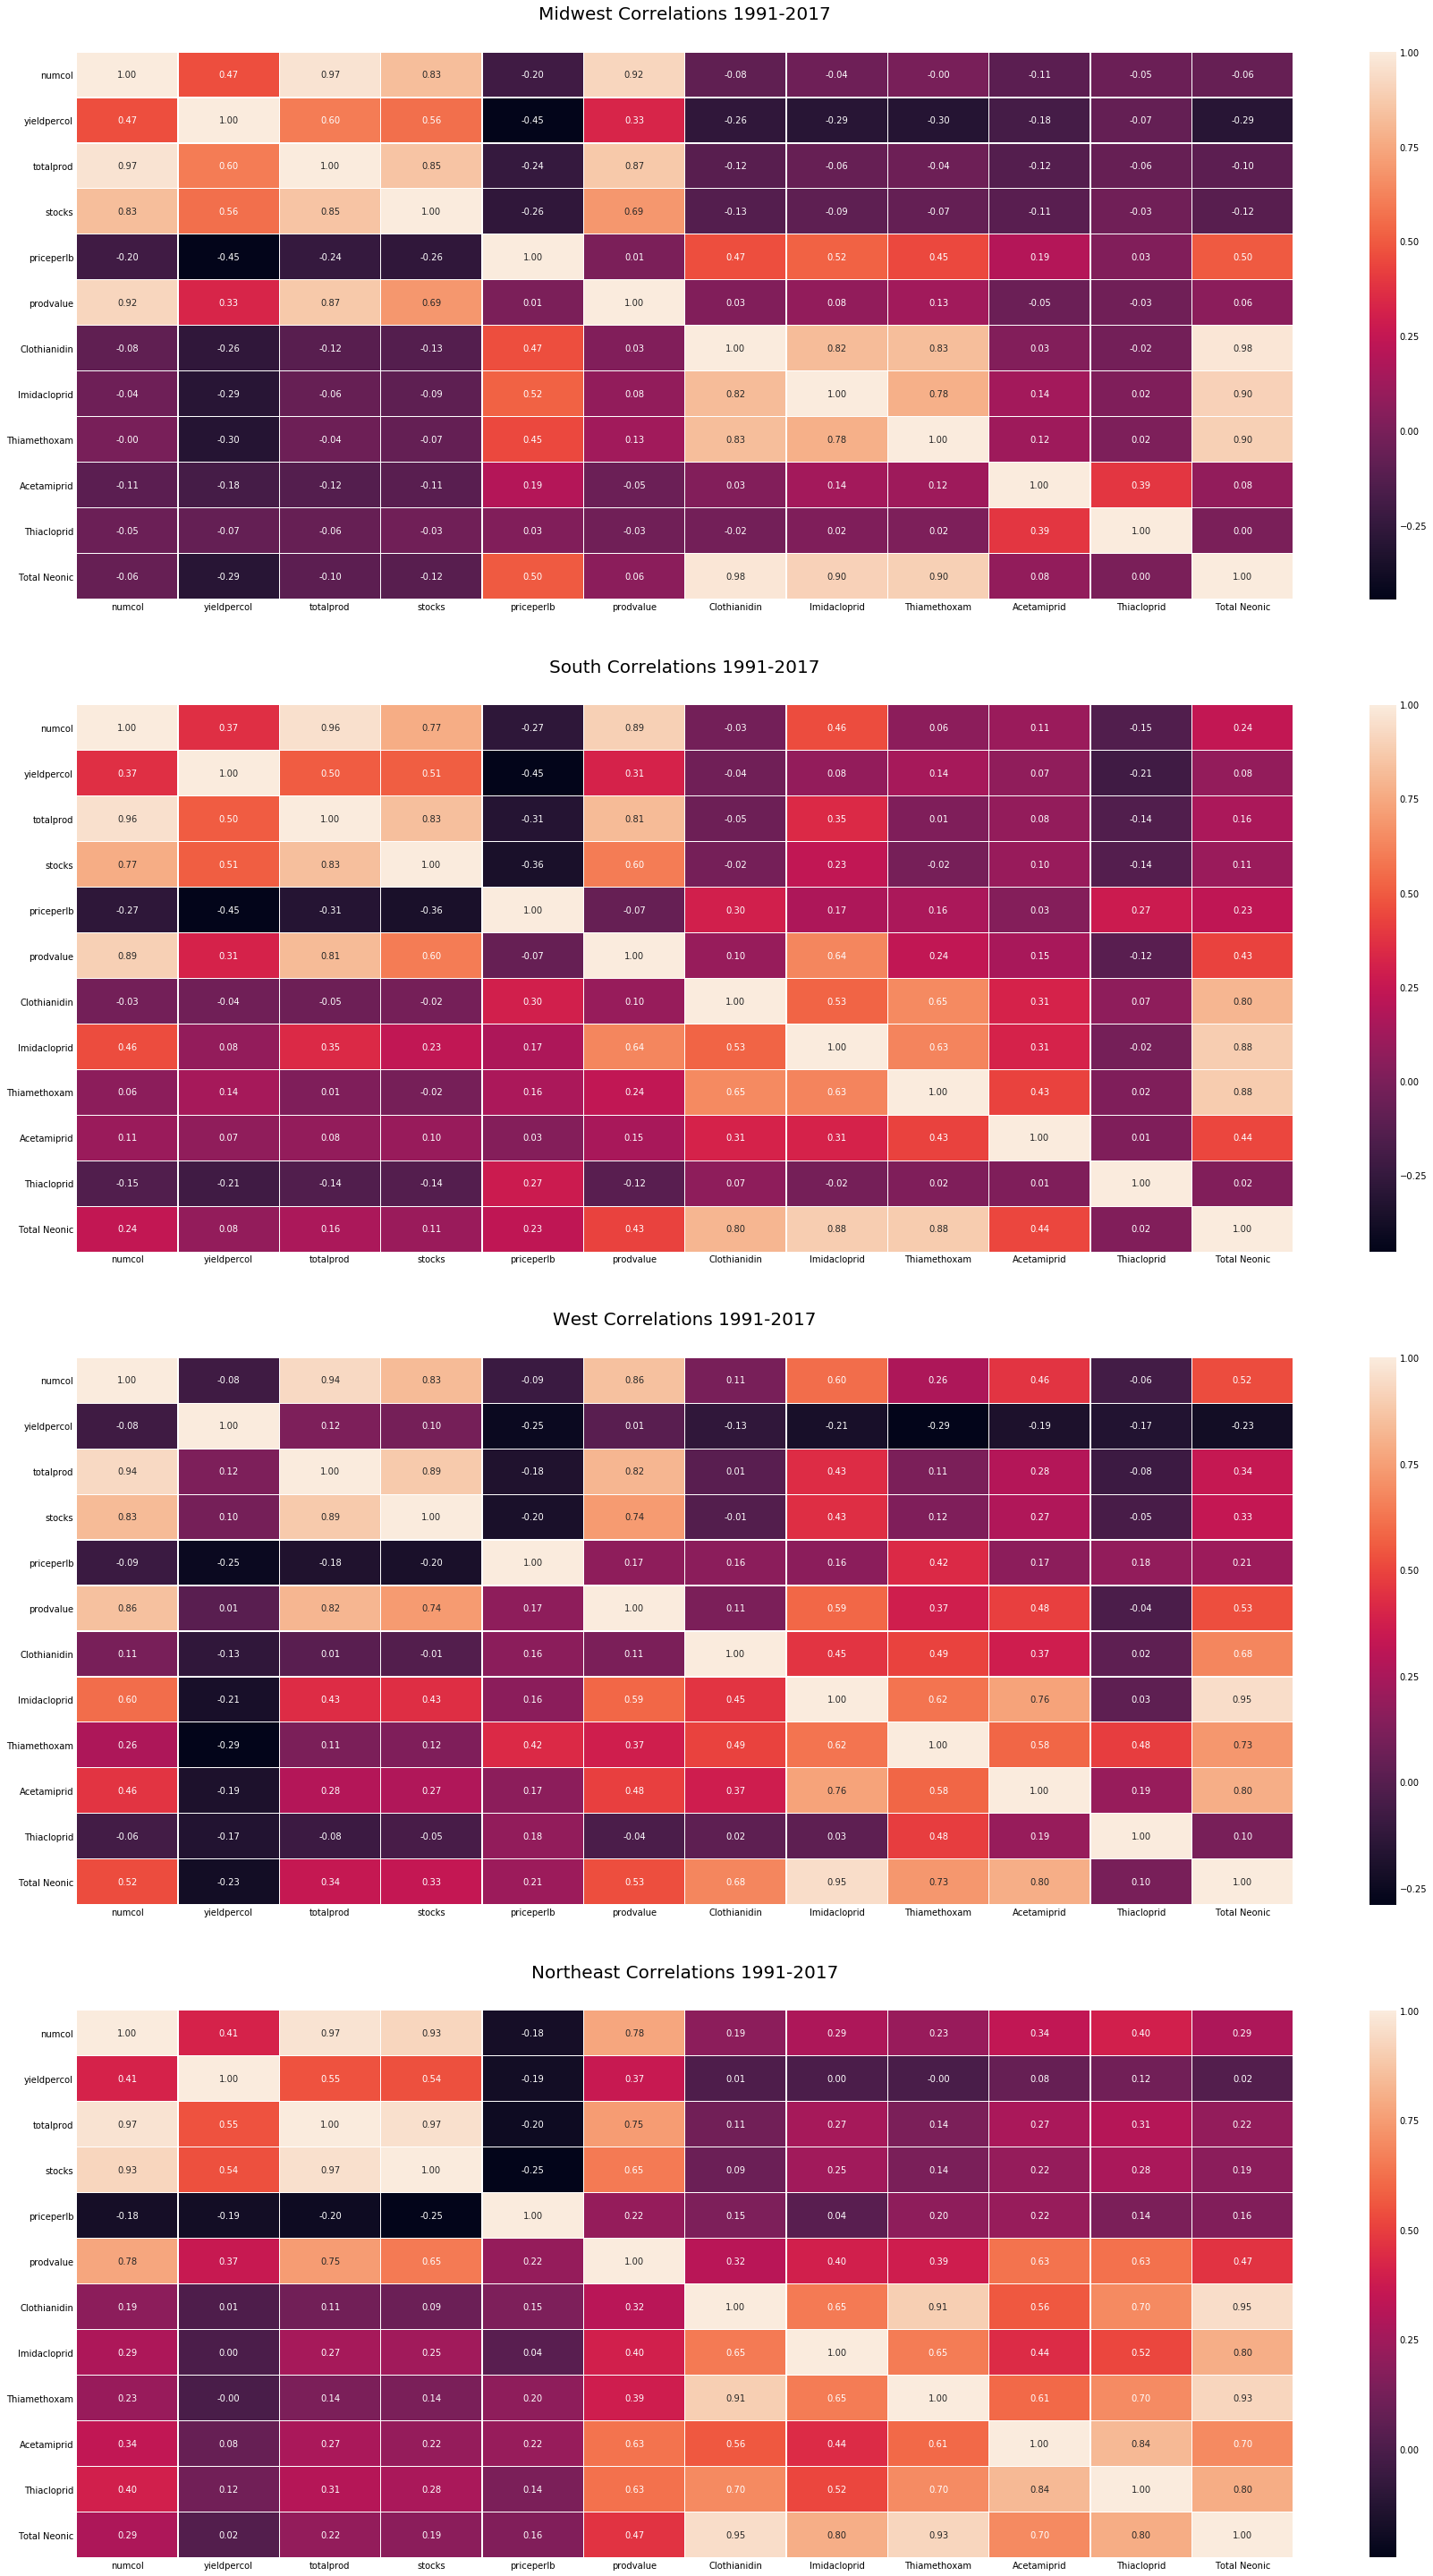

In [16]:
# We'll look for correlations using a heatmap for each region.

midwest = bee_data[bee_data.Region == 'Midwest']
south = bee_data[bee_data.Region == 'South']
west = bee_data[bee_data.Region == 'West']
northeast = bee_data[bee_data.Region == 'Northeast']

f,plot = plt.subplots(4, 1, figsize=(25, 40))

sns.heatmap(midwest[continuous_cols].corr(), annot=True, linewidths=.2, fmt= '.2f', ax=plot[0])
plot[0].set_title("Midwest Correlations 1991-2017", fontsize=20)
tt1 = plot[0].title
tt1.set_position([.5, 1.05])

sns.heatmap(south[continuous_cols].corr(), annot=True, linewidths=.2, fmt= '.2f',ax=plot[1])
plot[1].set_title("South Correlations 1991-2017", fontsize=20)
tt2 = plot[1].title
tt2.set_position([.5, 1.05])

sns.heatmap(west[continuous_cols].corr(), annot=True, linewidths=.2, fmt= '.2f',ax=plot[2])
plot[2].set_title("West Correlations 1991-2017", fontsize=20)
tt2 = plot[2].title
tt2.set_position([.5, 1.05])

sns.heatmap(northeast[continuous_cols].corr(), annot=True, linewidths=.2, fmt= '.2f',ax=plot[3])
plot[3].set_title("Northeast Correlations 1991-2017", fontsize=20)
tt3 = plot[3].title
tt3.set_position([.5, 1.05])

plt.tight_layout(h_pad=6.0)
plt.show()



OBSERVATIONS

1. Midwest:
   The Midwest shows Neonic pesticides as a detriment to colony productivity
   The Midwest saw a roughly a 30% negative correlation in yield per colony and an increase in the price of honey per 
   pound in relation to the use of Neonic pesticides. This is important information as the Midwest is the largest
   honey producer as a region.
   
2. South:
   The South is more complicated
   The South saw 46% significant positive correlation in relationship to the number of colonies and the use of 
   Imidacloprid, though without an increase in yield in relationship to the use of Imidacloprid.
   The South also saw a 21% negative correlation in yield and a 15% negative correlation in 
   the number of colonies in relationship to the use of Thiacloprid 

3. West:
   The West saw a moderate negative correlation between neonic pesticides and colony yields across the board,
   however, the number of colonies show a mostly positive correlation with the highest being 60%

4. Northeast: 
   The Northeast, which perhaps contains the largest gap in data (missing Connecticut, Massachussetts, Delaware, Rhode    Island, New Hampshire, and Maryland) shows itself to the most unaffected by the use of 
   neonic pesticides.





RESULTS: 
The data shows a ~15-20% drop in yield per colony in every region between 1991 and 2017 except the South (the second smallest honey procucing region) which shows a slight uptick of ~8%. The Midwest, which is on average the largest honey producing region of the US, showed about a 30% negative correlation between neonicotinoid use and the average yield per colony.
As a whole, the yield per colony of each region showed definite peaks and began decline before Neonicotinoids rose above a slight level. This suggests that though Neonicotinoid use correlates with a decrease in colony yield, there are other factors contributing to decline. 

Neonicotinoid pesticides show a a dramatic increase in usage beginning in 2003 and reach a peak in 2014 followed by a sudden drop off beginning in 2015. This drop off could be from domestic political fallout due to the 2013 lawsuit against the EPA by the Sierra Club and the Center for Environmental Health on the grounds of performing inadequate toxicity evaluations for Neonicotinoid pesticides, namely clothianidin
AND/OR international study and legislation such as the 2013 EU ban of imidacloprid, clothianidin, and thiamethoxam.

In order to protect Honey Bees, new studies need to be perfomed that show the prevalence of other factors such as climate, disease, the health and biological diversity of their feeding ground, wider statistics showing bees used for honey production as well as agricultural pollination, the standard of practice for their keepers, etc.



FURTHER QUESTIONS:
1. What data is available in the realm of bee colonies used for agricultural pollination such as in orchards instead
    of sites used primarily for honey production?

2. What percentage of wildflower vs agricultural plots did the diet of the bee colonies in the data consist of?

3. What factors outside of pesticide usage may have affected the areas that showed decline before the use of 
   Neonicotinoid pesticides?
   
4. Are there other Nicotinoids besides Clothianidin, Imidacloprid, Thiamethoxam, Acetamiprid, and Thiacloprid that        should be studied?

5. Were any of the bee colonies in the data set mobile colonies (colonies seasonally moved between states to pollinate    crops)
   



Acknowledgements:
"Honey Bees and Neonic Pesticides" (Kevin Smith) data set via Kaggle (data extracted from both the USDA and USGS)

B. A. Woodcock1,*, J. M. Bullock1, R. F. Shore2, M. S. Heard1, M. G. Pereira2, J. Redhead1, L. Ridding1, H. Dean1, D. Sleep2, P. Henrys2, J. Peyton1, S. Hulmes1, L. Hulmes1, M. Sárospataki3, C. Saure4, M. Edwards5, E. Genersch6, S. Knäbe7, R. F. Pywell1.
"Country-specific effects of neonicotinoid pesticides on honey bees and wild bees"
Science  30 Jun 2017:
Vol. 356, Issue 6345, pp. 1393-1395
DOI: 10.1126/science.aaa1190
    